In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in all files and combine into one dataframe

In [2]:
# read data into pandas dataframe
df_one = pd.read_json('StreamingHistory0.json')
df_two = pd.read_json('StreamingHistory1.json')
df_three = pd.read_json('StreamingHistory2.json')
df_four = pd.read_json('StreamingHistory3.json')

# concatenate dataframes
df = pd.concat([df_one, df_two, df_three, df_four], ignore_index=True)

# show first 5 rows of dataframe
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-11-27 19:10,Mercy Chinwo,Akamdinelu,220133
1,2022-12-16 18:13,Mayorkun,Up To Something,173108
2,2022-12-17 09:55,Relationship Advice,381: All About Money And Relationships,614058
3,2022-12-17 09:59,Black Sherif,Second Sermon - Remix,252493
4,2022-12-17 10:06,Fireboy DML,Spell,56937


In [3]:
# shape of dataframe
df.shape

(38232, 4)

In [4]:
# check for missing values
df.isnull().sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [5]:
# check types of columns
df.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# convert milliseconds column to minutes and round to 2 decimal places
df['msPlayed (minutes)'] = (df['msPlayed'] / 60000).round(2)

Text(0, 0.5, 'Artist Name')

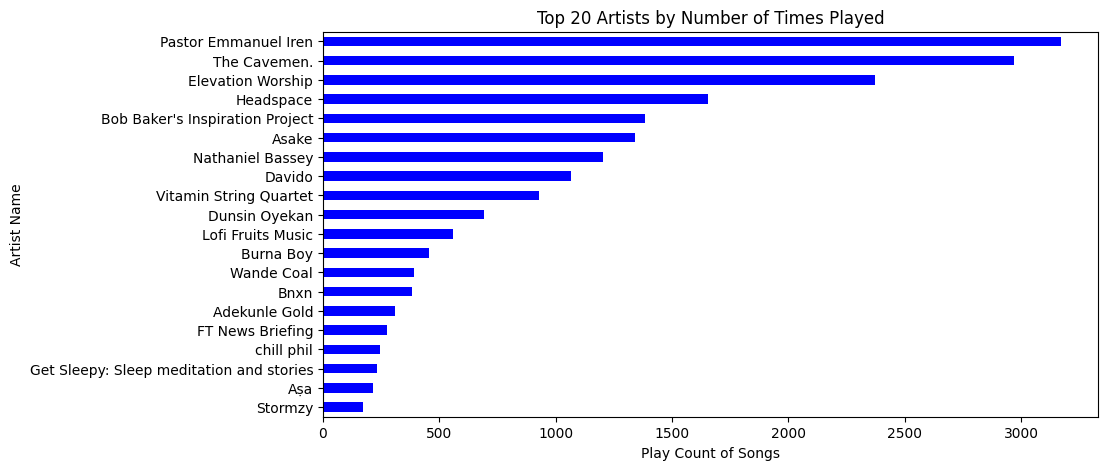

In [22]:
# display the top 20 artists, ranked according to the total number of times their songs have been played.
plt.title("Top 20 Artists by Number of Times Played")
df_artist_by_count = df["artistName"].value_counts(ascending=False).head(20).sort_values(ascending=True)
df_artist_by_count.plot(kind="barh", figsize=(10,5), color="blue")
plt.xlabel("Play Count of Songs")
plt.ylabel("Artist Name")

Text(0, 0.5, 'Artist Name')

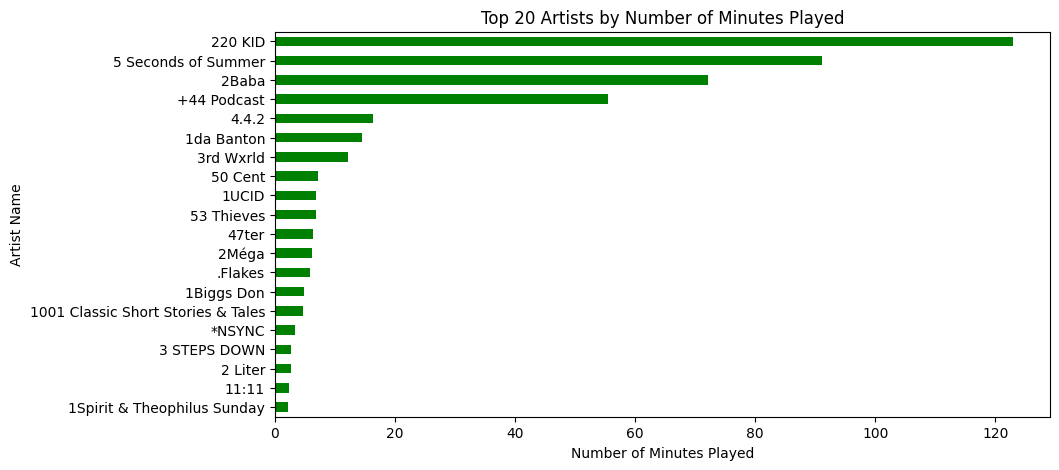

In [20]:
# display the top 20 artists, ranked according to the total number of minutes their songs have been played. 
plt.title("Top 20 Artists by Number of Minutes Played")
df_artist_by_minutes = df.groupby("artistName")["msPlayed (minutes)"].sum().head(20).sort_values(ascending=True)
df_artist_by_minutes.plot(kind="barh", figsize=(10,5), color="green")
plt.xlabel("Number of Minutes Played")
plt.ylabel("Artist Name")

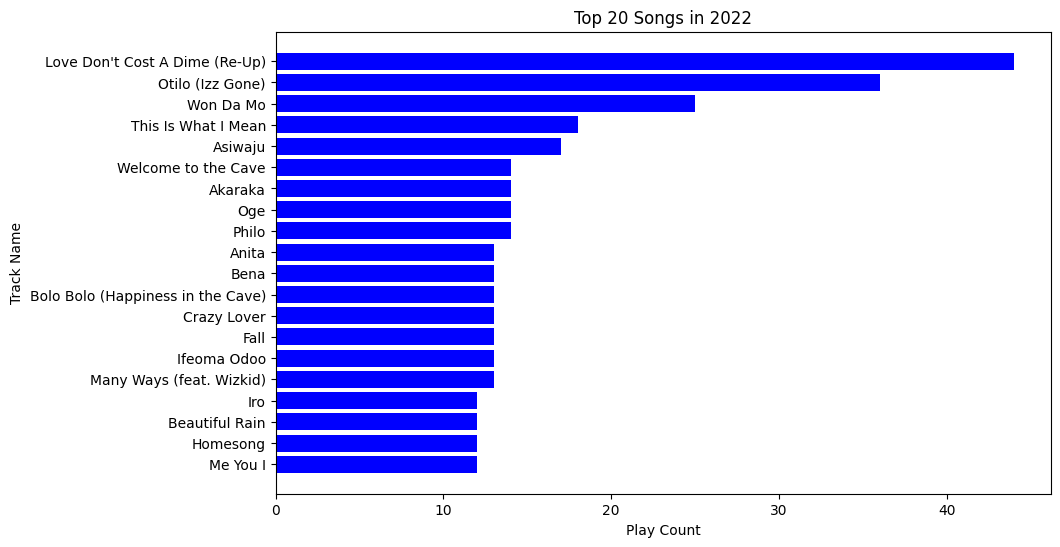

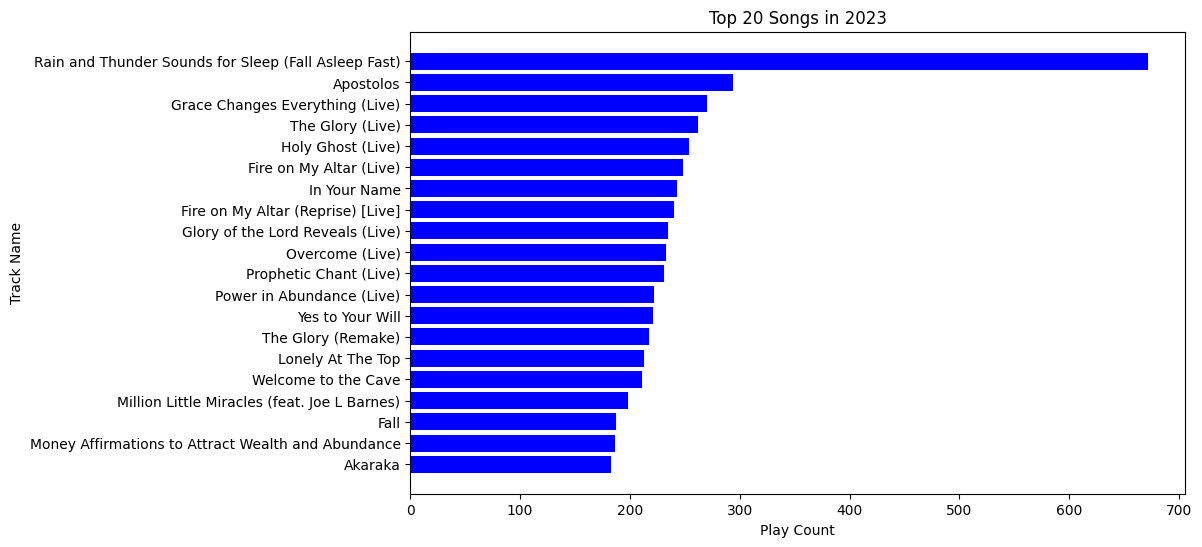

In [38]:
# get the total play count for songs in each year
# convert endTime to datetime and extract year and month
df['endTime'] = pd.to_datetime(df['endTime'])
df['year'] = df['endTime'].dt.year
df['month'] = df['endTime'].dt.month

# top 20 songs by play count each year
top_20_songs_year = df.groupby(['year', 'trackName']).size().reset_index(name='playCount')
top_20_songs_year = top_20_songs_year.sort_values(['year', 'playCount'], ascending=[True, False])
top_20_songs_year = top_20_songs_year.groupby('year').head(20)

# visualize top 20 Songs by year
for year in top_20_songs_year['year'].unique():
    plt.figure(figsize=(10, 6))
    df_year = top_20_songs_year[top_20_songs_year['year'] == year]
    df_year = df_year.sort_values('playCount', ascending=True)
    plt.barh(df_year['trackName'], df_year['playCount'], color='blue')
    plt.xlabel('Play Count')
    plt.ylabel('Track Name')
    plt.title(f'Top 20 Songs in {year}')
    plt.show()

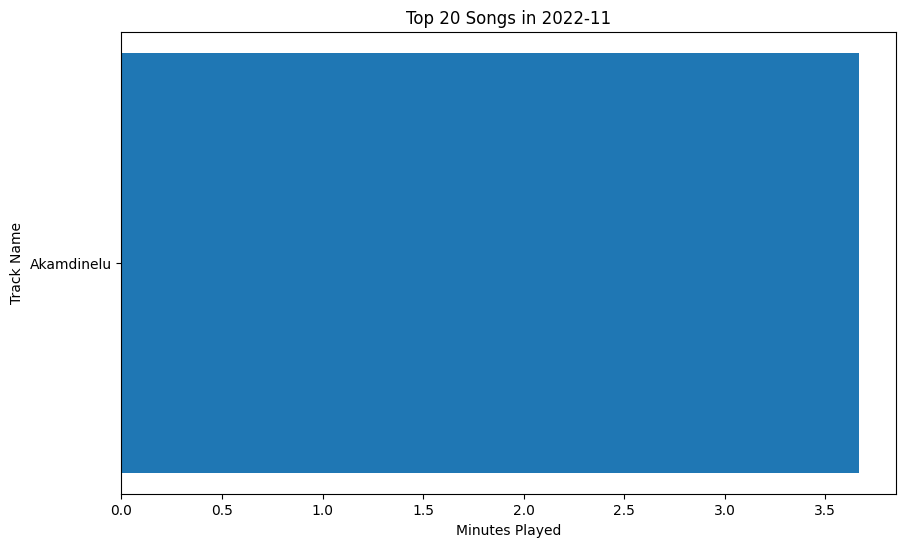

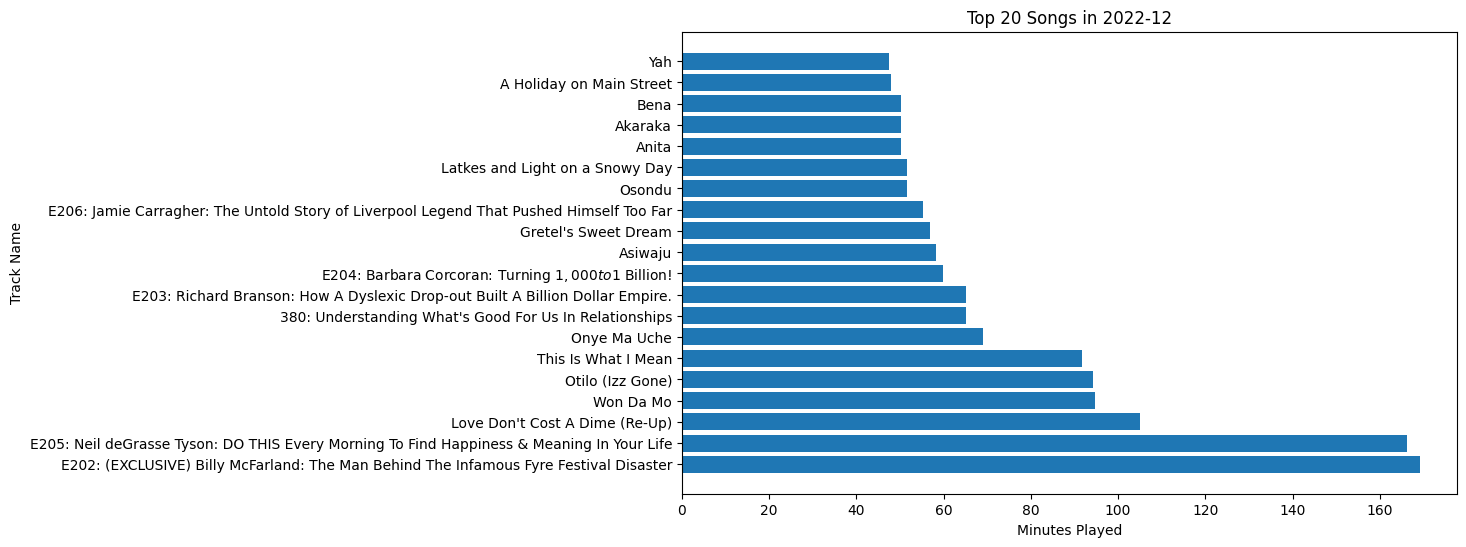

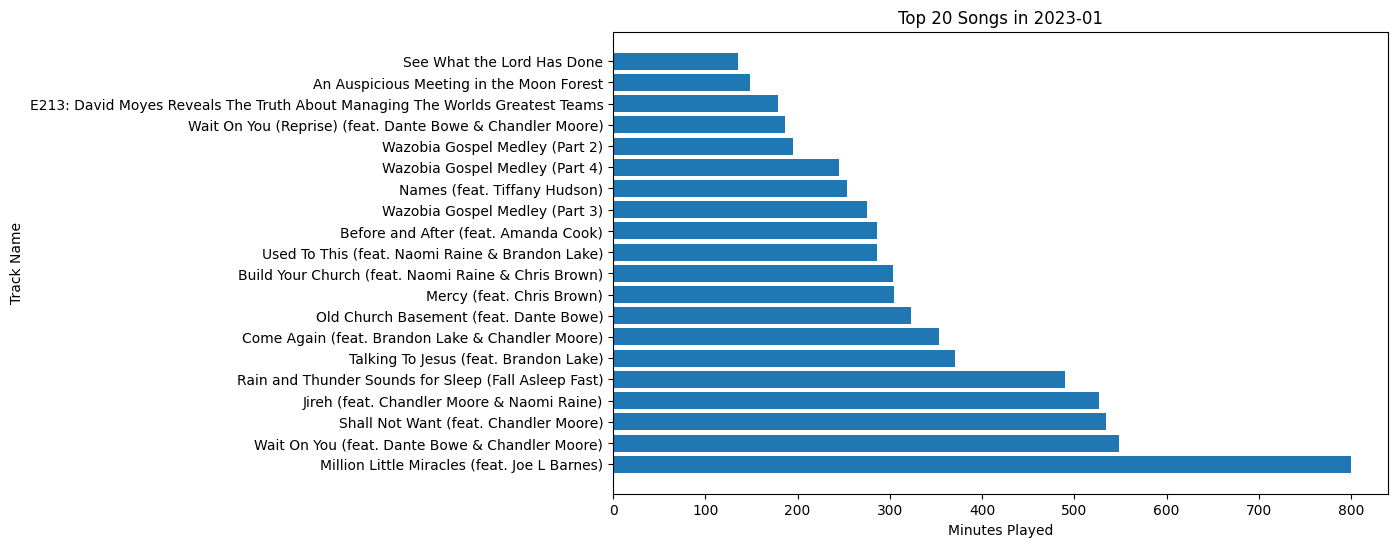

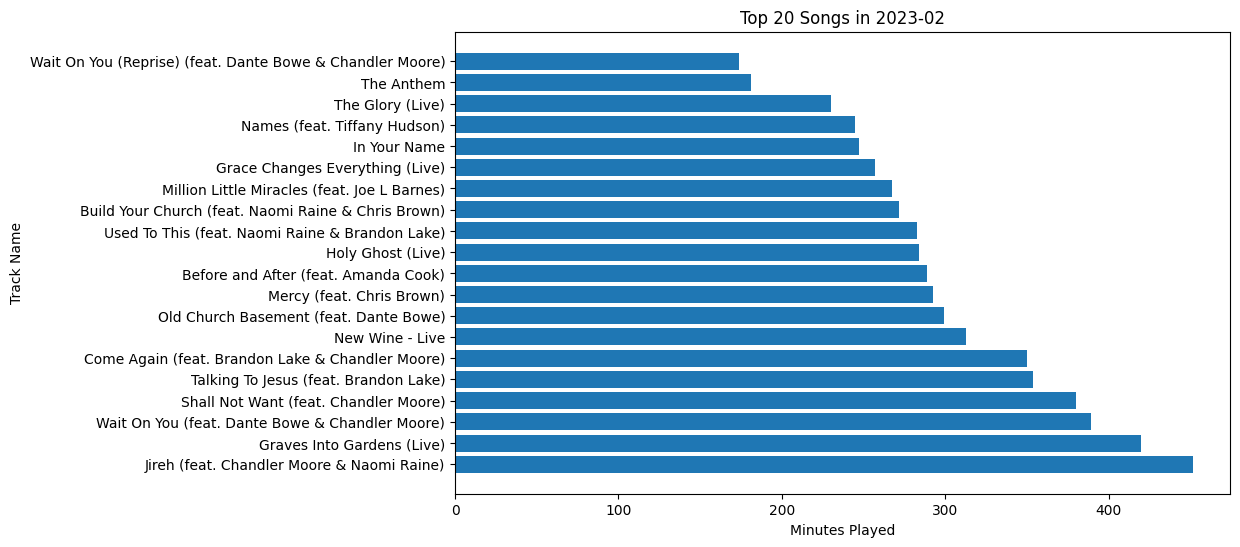

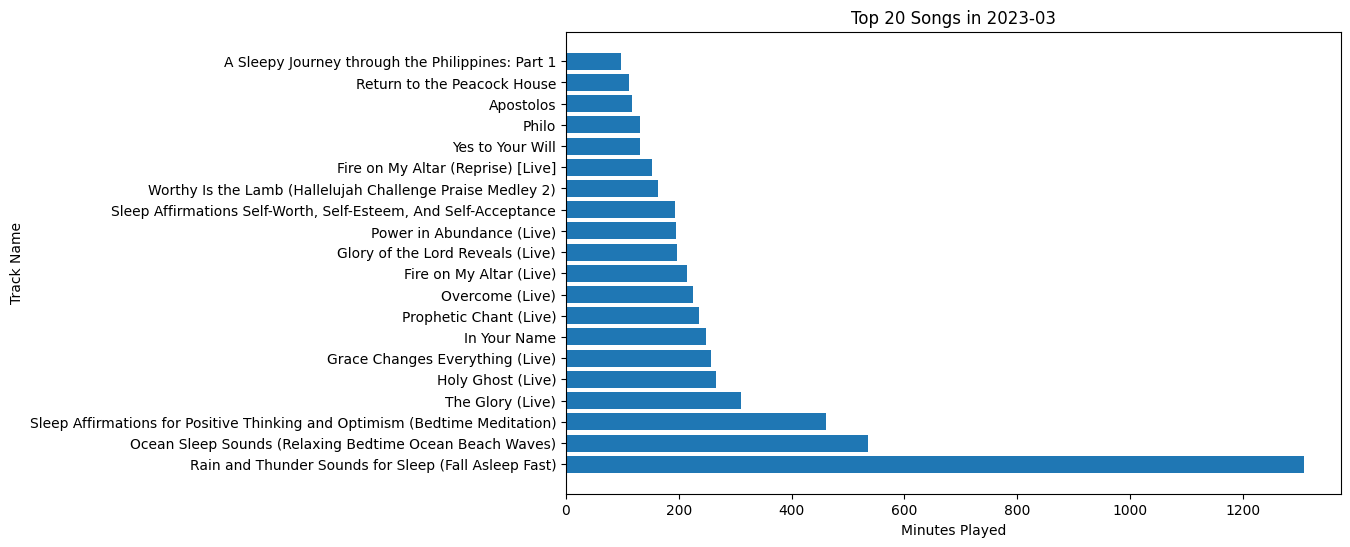

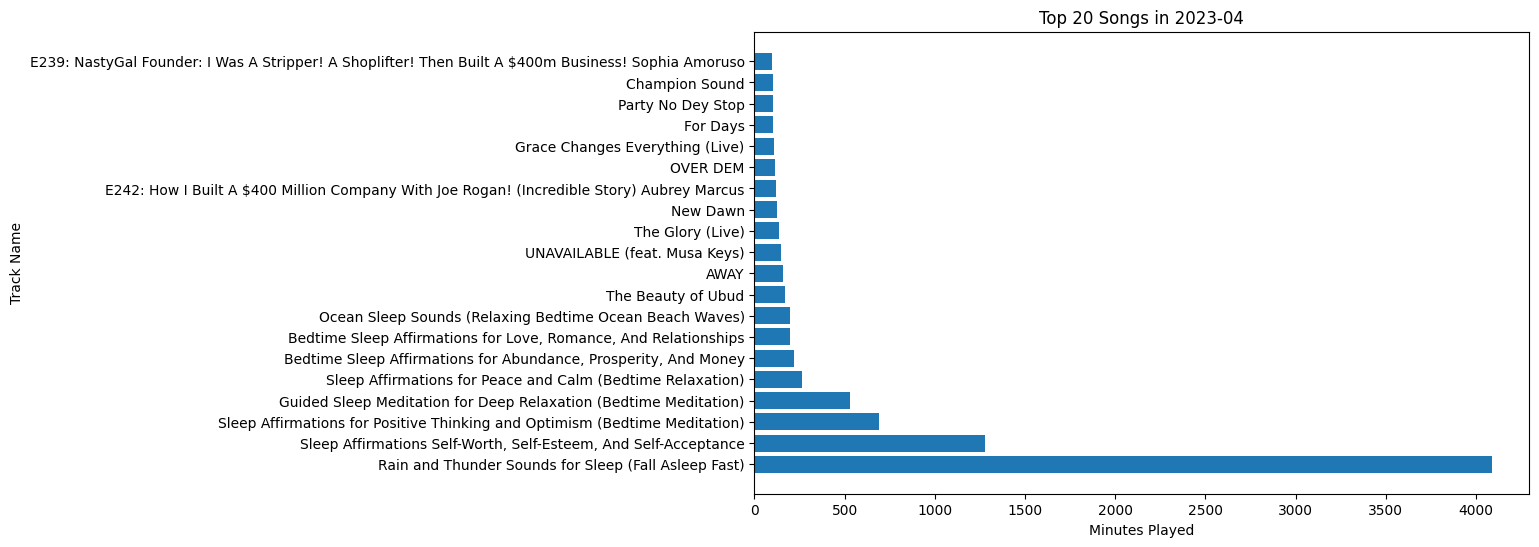

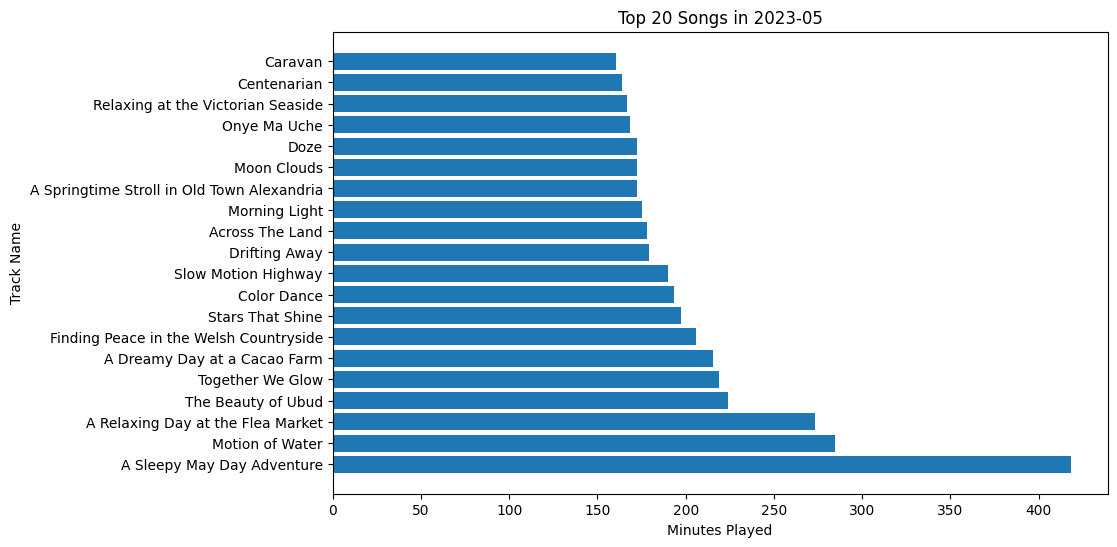

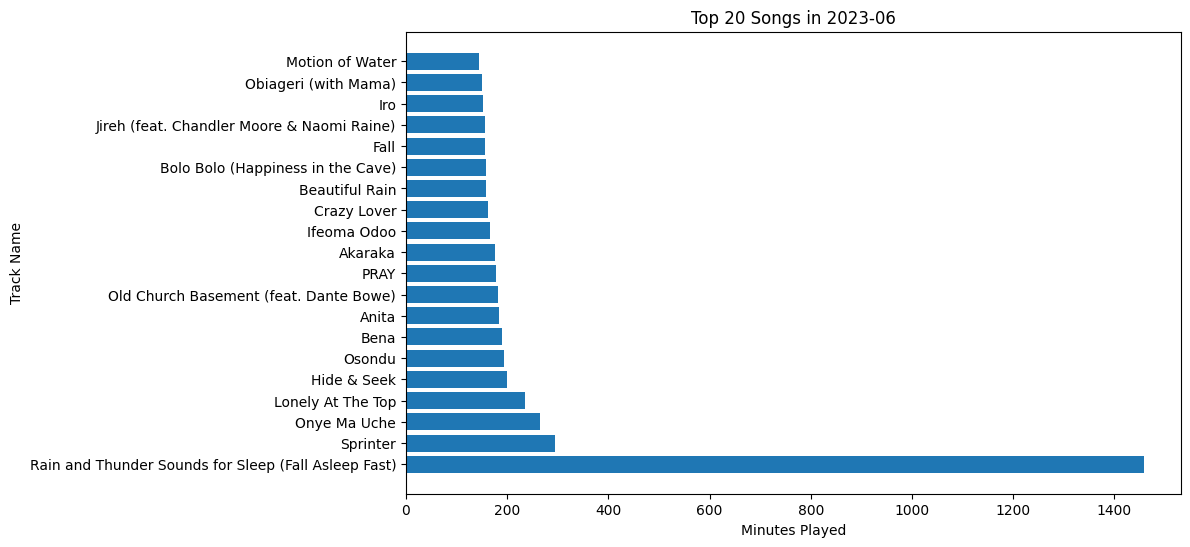

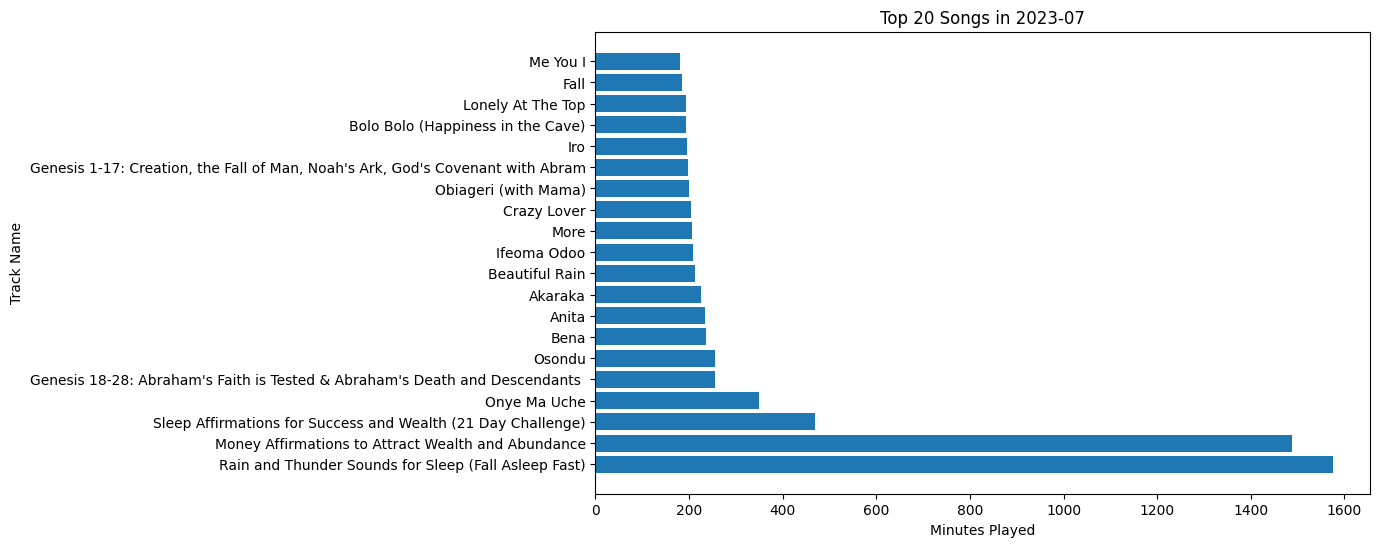

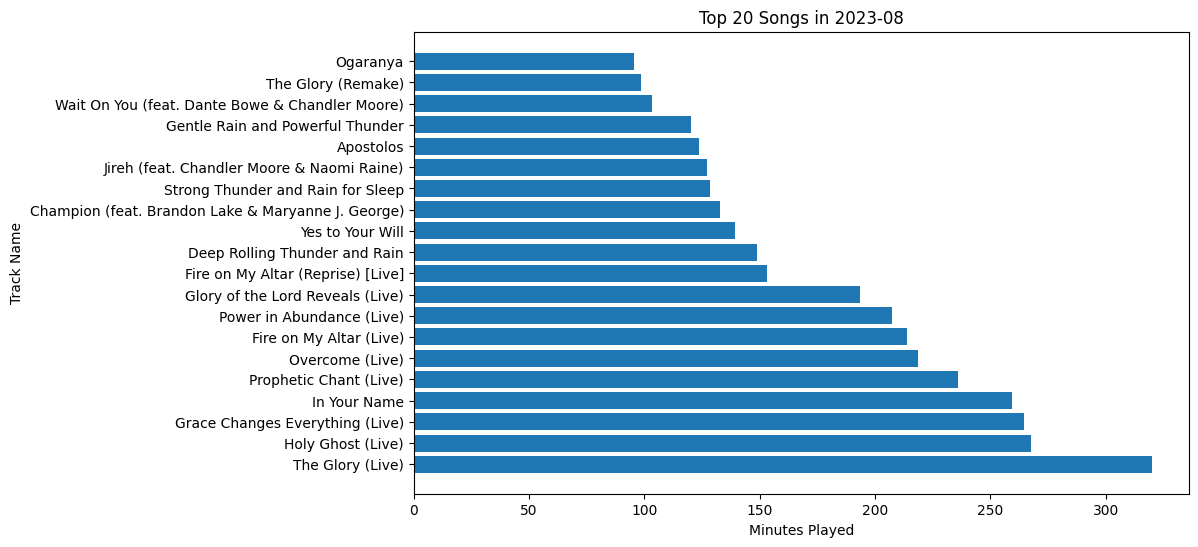

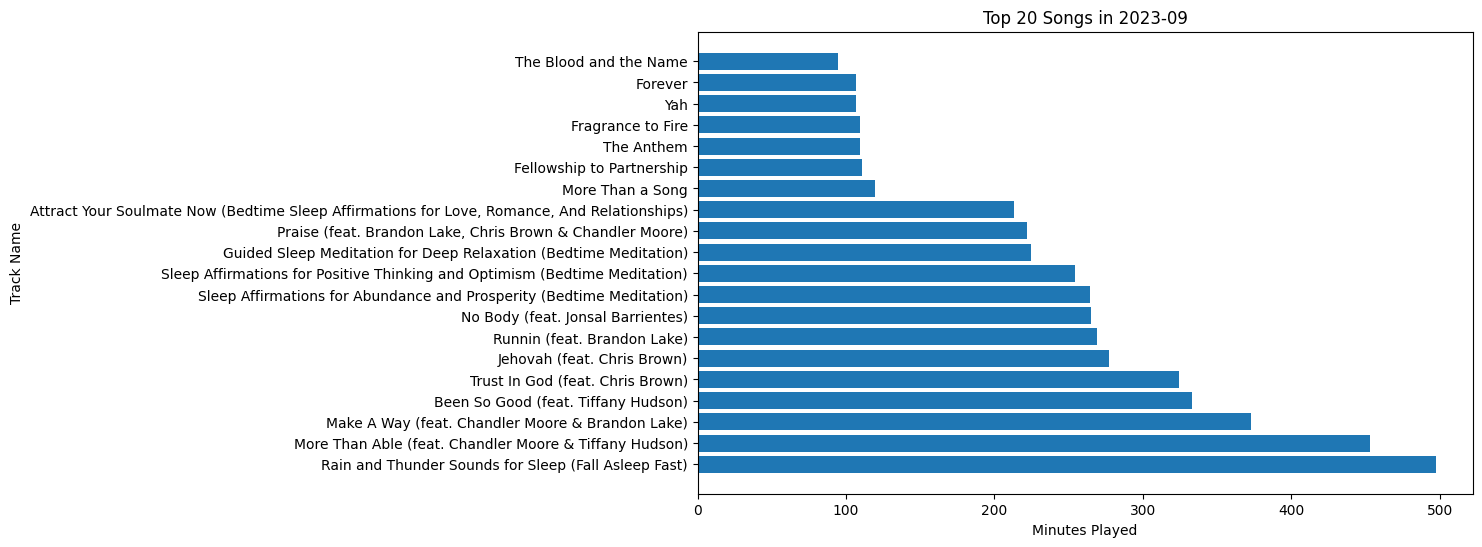

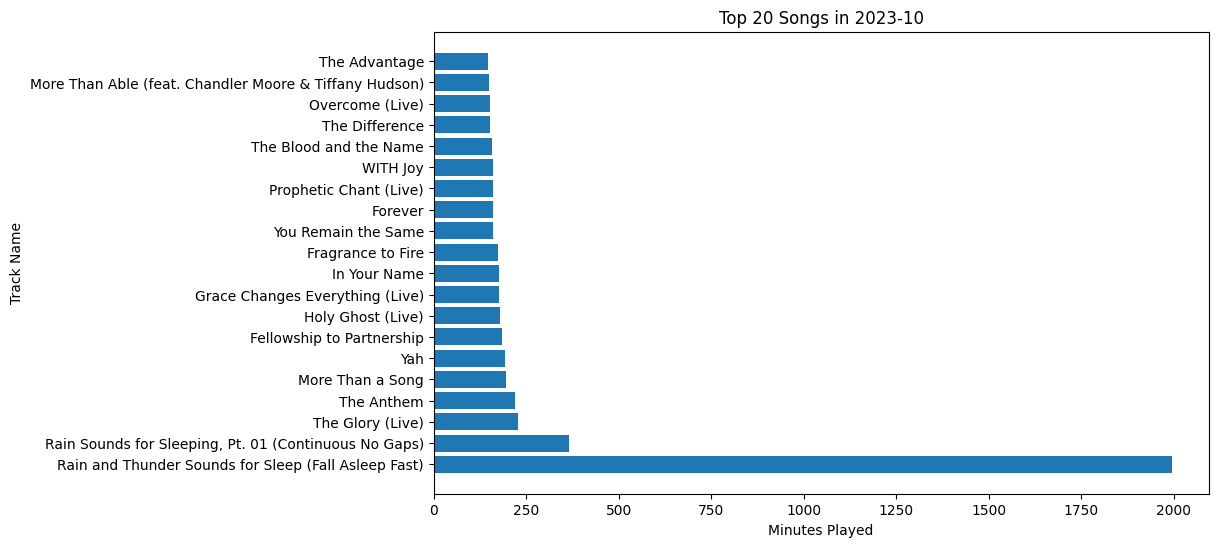

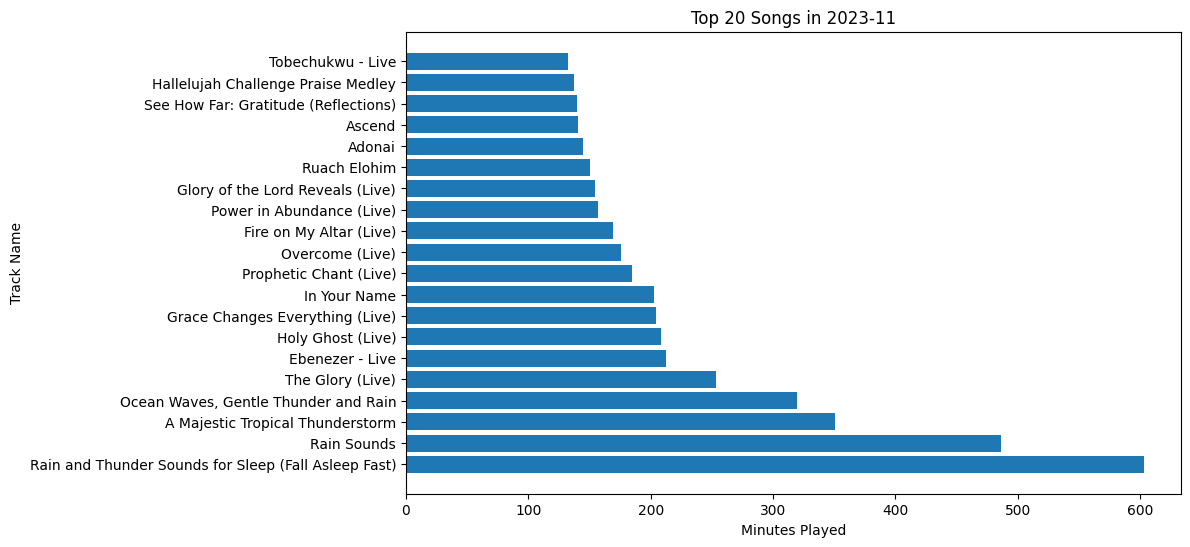

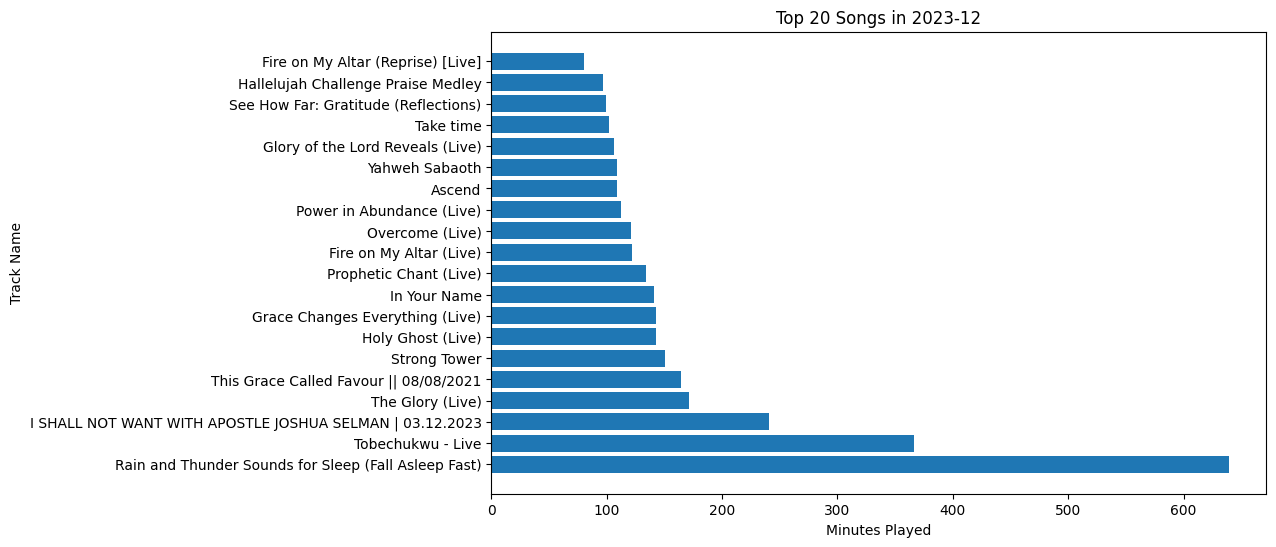

In [39]:
# top 20 songs by number of minutes played each month
top_20_songs_month = df.groupby(['year', 'month', 'trackName'])['msPlayed (minutes)'].sum().reset_index()
top_20_songs_month = top_20_songs_month.sort_values(['year', 'month', 'msPlayed (minutes)'], ascending=[True, True, False])
top_20_songs_month = top_20_songs_month.groupby(['year', 'month']).head(20)

# visualize Top 20 Songs by Month
for (year, month), group in top_20_songs_month.groupby(['year', 'month']):
    plt.figure(figsize=(10, 6))
    plt.barh(group['trackName'], group['msPlayed (minutes)'])
    plt.xlabel('Minutes Played')
    plt.ylabel('Track Name')
    plt.title(f'Top 20 Songs in {year}-{month:02d}')
    plt.show()

Text(0.5, 1.0, 'Distribution of Streams Across Different Hours of the Day')

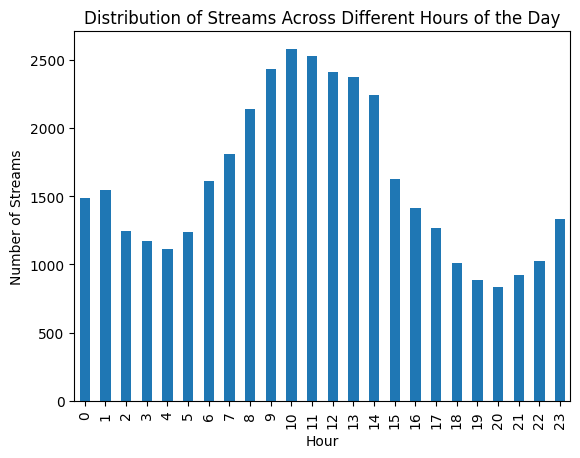

In [41]:
# get the hour of the day when songs were played
# convert endTime to a datetime column and extract the hour
df['hour'] = pd.to_datetime(df['endTime']).dt.hour

# plot the distribution of streams across different hours of the day
df_distribution = df['hour'].value_counts().sort_index()
df_distribution.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Number of Streams')
plt.title('Distribution of Streams Across Different Hours of the Day')


In [ ]:
import spotipy
import matplotlib.pyplot as plt
from collections import Counter
from spotipy.oauth2 import SpotifyClientCredentials

# get the genre in which each track falls into

# Authenticate with Spotify
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='********', client_secret='********'))

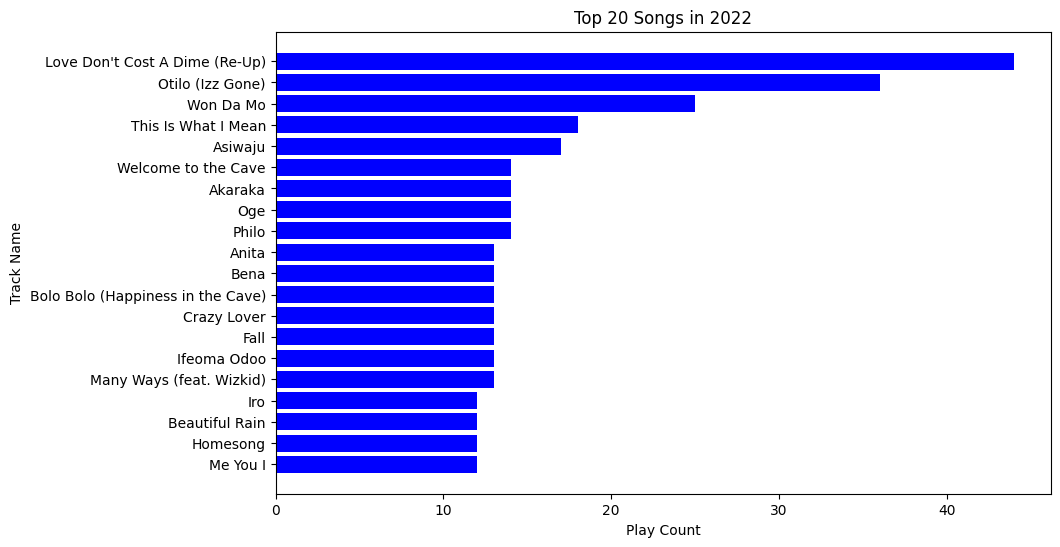

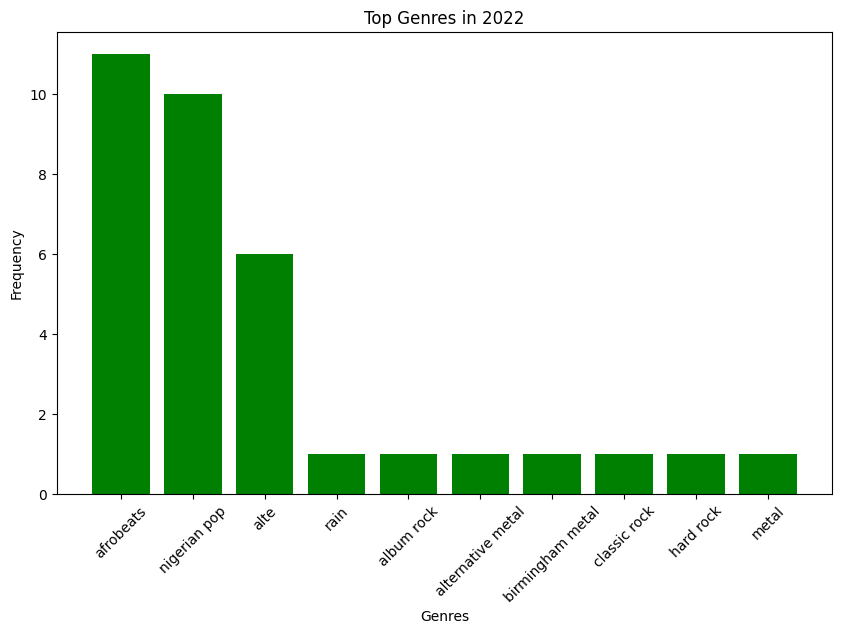

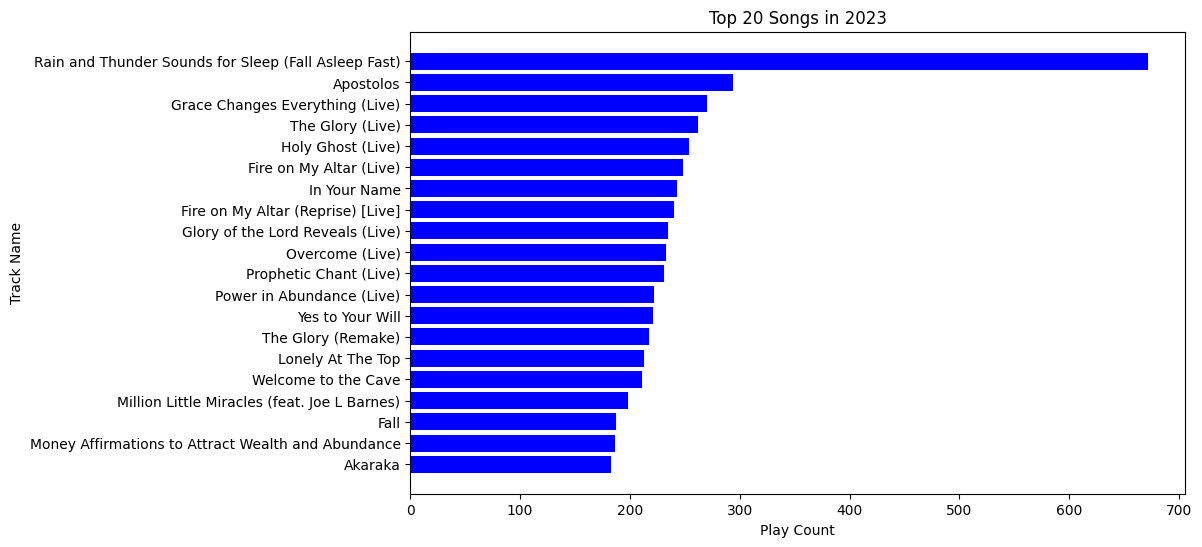

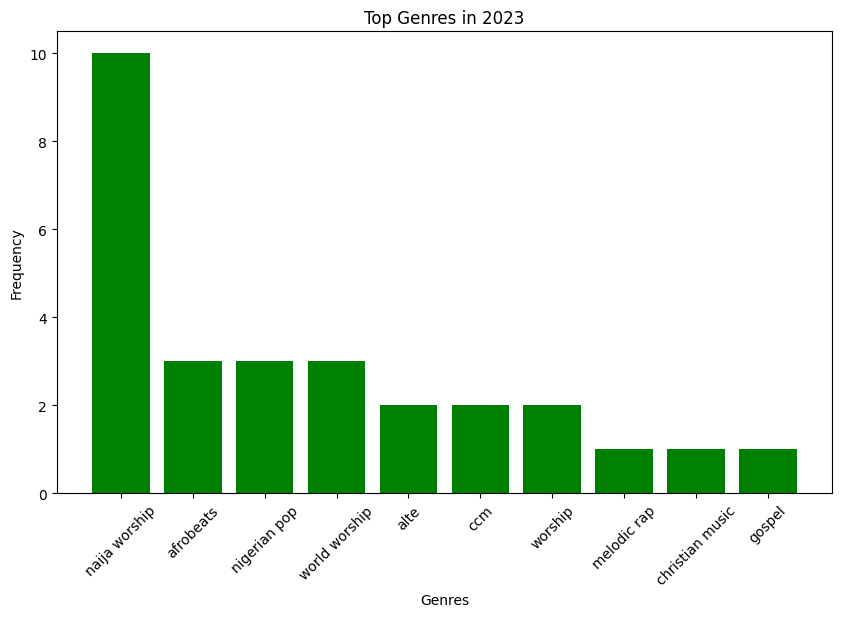

In [46]:
# Visualize top 20 Songs by year
for year in top_20_songs_year['year'].unique():
    plt.figure(figsize=(10, 6))
    df_year = top_20_songs_year[top_20_songs_year['year'] == year]
    df_year = df_year.sort_values('playCount', ascending=True)
    plt.barh(df_year['trackName'], df_year['playCount'], color='blue')
    plt.xlabel('Play Count')
    plt.ylabel('Track Name')
    plt.title(f'Top 20 Songs in {year}')
    plt.show()
    
    # Fetch genres for tracks in the specific year
    genres_counter = Counter()
    for track in df_year['trackName']:
        # Search for the track to get track details
        track_data = sp.search(q=track, type='track')
        # Check if there are items returned in the search
        if track_data['tracks']['items']:
            # Get the first track's details
            first_track = track_data['tracks']['items'][0]
            # Get the artist ID from the track's details
            artist_id = first_track['artists'][0]['id']
            # Get the artist's details, which includes genres
            artist_details = sp.artist(artist_id)
            # Update the counter with the genres of the current track
            genres_counter.update(artist_details['genres'])
        else:
            print(f"No results for {track}")
            
    # Visualize the top genres for the specific year
    top_genres = dict(genres_counter.most_common(10))  # Get the top 10 genres
    plt.figure(figsize=(10, 6))
    plt.bar(top_genres.keys(), top_genres.values(), color='green')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.title(f'Top Genres in {year}')
    plt.xticks(rotation=45)
    plt.show()